<a href="https://colab.research.google.com/github/SandraPinto/Data-606-Capstone/blob/main/Capstone_EDA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing libraries to do EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
#Importing raw cvs file posted on my github
url = 'https://raw.githubusercontent.com/SandraPinto/Data-606-Capstone/main/PRC%20Data%20Breach%20Chronology%20-%201.13.20.csv'
df1 = pd.read_csv(url)

In [4]:
#Removing uncessary columns
columns = ["Unnamed: 13", "Unnamed: 14", "Unnamed: 15"] #define the columns to be removed
df2= df1.drop(columns, axis=1)

In [5]:
#dropping N/A items
df3 = df2.dropna()

In [6]:
df3.head()

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude
291,1/1/2015,Summit Financial Group,La Mesa,California,DISC,BSF,662,"After a Summit client files a tax return, we m...",California Attorney General,https://oag.ca.gov/system/files/Sample%20Notic...,2015,32.767829,-117.023084
431,5/5/2016,Stonebridge Realty Advisors,Glenwood Springs,Colorado,HACK,BSO,0,"""What HappenedBased upon an extensive forensic...",California Attorney General,https://oag.ca.gov/system/files/49932072_6_1.pdf,2016,39.550538,-107.324776
467,8/3/2016,Yuba Sutter Medical Center,Yuba City,California,HACK,MED,0,"""What HappenedOn or about August 3, 2016, the ...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2016,39.140448,-121.616911
503,10/20/2016,Premium Beat,Montreal,Quebec,HACK,BSO,0,"""To ensure you continue having the highest lev...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2016,45.501689,-73.567256
583,3/3/2017,"Weekends Only, Inc.",St. Louis,Missouri,HACK,MED,0,"name, payment card info, address\nLocation of ...",California Attorney General,http://www.marylandattorneygeneral.gov/Pages/I...,2017,38.713107,-90.429840


In [7]:
df3.shape

(359, 13)

In [8]:
#Dropping duplicates

df3.drop_duplicates(keep='first', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df3.shape

(359, 13)

In [10]:
df3.isnull().count()

Date Made Public           359
Company                    359
City                       359
State                      359
Type of breach             359
Type of organization       359
Total Records              359
Description of incident    359
Information Source         359
Source URL                 359
Year of Breach             359
Latitude                   359
Longitude                  359
dtype: int64

In [11]:
df3.fillna('missinginfo', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [12]:
df3.isnull().count()

Date Made Public           359
Company                    359
City                       359
State                      359
Type of breach             359
Type of organization       359
Total Records              359
Description of incident    359
Information Source         359
Source URL                 359
Year of Breach             359
Latitude                   359
Longitude                  359
dtype: int64

In [13]:
df3.value_counts(normalize=True)

Date Made Public  Company                             City           State       Type of breach  Type of organization  Total Records  Description of incident                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [14]:
df3.head(15)

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude
291,1/1/2015,Summit Financial Group,La Mesa,California,DISC,BSF,662,"After a Summit client files a tax return, we m...",California Attorney General,https://oag.ca.gov/system/files/Sample%20Notic...,2015,32.767829,-117.023084
431,5/5/2016,Stonebridge Realty Advisors,Glenwood Springs,Colorado,HACK,BSO,0,"""What HappenedBased upon an extensive forensic...",California Attorney General,https://oag.ca.gov/system/files/49932072_6_1.pdf,2016,39.550538,-107.324776
467,8/3/2016,Yuba Sutter Medical Center,Yuba City,California,HACK,MED,0,"""What HappenedOn or about August 3, 2016, the ...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2016,39.140448,-121.616911
503,10/20/2016,Premium Beat,Montreal,Quebec,HACK,BSO,0,"""To ensure you continue having the highest lev...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2016,45.501689,-73.567256
583,3/3/2017,"Weekends Only, Inc.",St. Louis,Missouri,HACK,MED,0,"name, payment card info, address\nLocation of ...",California Attorney General,http://www.marylandattorneygeneral.gov/Pages/I...,2017,38.713107,-90.429840
604,4/4/2017,Auto Pride Car Wash,Redwood City,California,HACK,BSO,0,"""Auto Pride Car Wash was informed on March 27,...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,37.485215,-122.236355
605,4/6/2017,Edgar & Associates LLP,Sacramento,California,HACK,BSF,0,"""What Happened?After experiencing unusual acti...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,38.492536,-121.522269
606,4/10/2017,WildWater Express Carwash,Sab Pedro,California,HACK,BSO,0,"""WildWater Express Carwash was informed on Mar...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,33.737600,-118.289892
607,4/10/2017,Acme Car Wash and Clearwater Express,Salina,California,HACK,BSO,0,"""Acme Car Wash and Clearwater Express Car Wash...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,38.840281,-97.611424
608,4/13/2017,Fingerhut,Saint Cloud,Minnesota,HACK,BSO,0,"""What Happened We believe that your personal i...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,45.566318,-94.245355


In [15]:
gkk = df3.groupby(['Type of breach', 'Type of organization'])
  
# Print the first value in each group
gkk.first()

Date Made Public  ...   Longitude
Type of breach Type of organization                   ...            
DISC           BSF                          1/1/2015  ... -117.023084
               BSO                         11/9/2017  ... -117.161084
               BSR                        12/23/2017  ... -111.850766
               EDU                        11/14/2017  ... -119.018713
               GOV                         4/24/2017  ... -118.245720
               MED                         5/17/2017  ... -118.193740
               NGO                        12/28/2017  ... -117.161084
HACK           BSF                          4/6/2017  ... -121.522269
               BSO                          5/5/2016  ... -107.324776
               BSR                        12/28/2017  ... -118.243685
               EDU                         4/20/2017  ... -121.949957
               GOV                          9/1/2016  ...  -74.005941
               MED                          8/3/2016  ... -121.616911
               NGO                         5/17/2017  ... -106.605553
INSD           BSF                         2/21/2007  ...  -82.457178
               GOV                         9/16/2017  ...  -91.733685
               MED                         6/30/2017  ... -121.886329
PHYS           BSF                         7/27/2017  ... -122.456371
               BSO                        11/15/2017  ...  -96.948895
               EDU                         11/9/2017  ... -117.853717
               MED                          2/3/2014  ...  -97.703321
PORT           BSF                          9/8/2017  ... -118.243685
               BSO                          2/6/2016  ...  -73.628196
               MED                         3/25/2014  ...  -84.503716
UNKN           BSO                        12/29/2017  ...  -74.268729
               BSR                         1/19/2018  ...  -77.152758
               EDU                         1/24/2018  ...    0.000000

[27 rows x 11 columns]

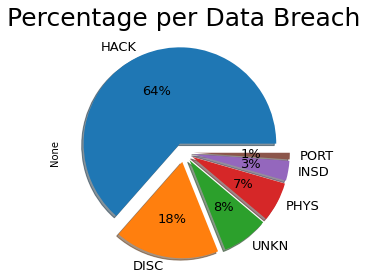

In [16]:
#creating pie chart from datframe to show total percentage per Data breach type
import matplotlib.pyplot as plt

df3.value_counts('Type of breach').plot.pie(autopct='%1.0f%%',fontsize=13,shadow=True,explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.title('Percentage per Data Breach', fontsize=25)
plt.tight_layout() 
plt.show()


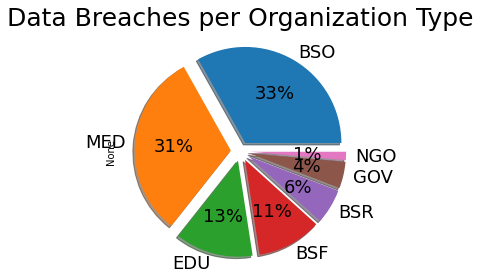

In [17]:

#creating pie chart from datframe to show total percentage of Data breaches per organization type
import matplotlib.pyplot as plt

df3.value_counts('Type of organization').plot.pie(autopct='%1.0f%%',fontsize=18, shadow=True,explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.title('Data Breaches per Organization Type', fontsize=25)
plt.tight_layout() 
plt.show()

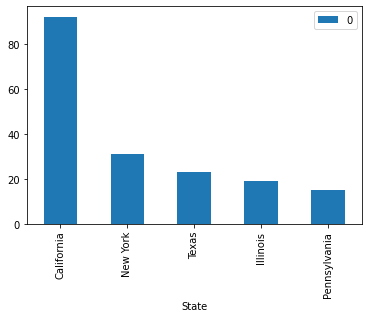

In [18]:
#creating bar chart to show the tip 5 states where most breaches happened

top5 = df3.value_counts('State',).to_frame()
top5.sort_values(by=0, ascending=False, inplace=True)
top5.iloc[:5,].plot(kind='bar');

In [19]:
#stopwords from dataframe 
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'no', "hadn't", 'if', "wouldn't", 'about', 'why', 'more', 'my', 'same', 'is', 'herself', 'o', 'above', 'in', 'to', 'what', "doesn't", 'has', "mustn't", 'her', 'do', 'once', "won't", 'their', 'between', 'am', 'where', 'only', "wasn't", "aren't", 'myself', 'there', 'did', 'your', 's', 'here', 've', 'his', 'ma', 'at', 'ain', "should've", 'doing', "shouldn't", 'haven', 'the', 'd', 'its', "you'll", 'by', 'that', 'some', "you'd", 'will', 'now', 'so', 'yours', 'which', "it's", 'we', 'through', 'again', 'aren', 'shan', 'weren', 'an', 'and', "haven't", 'these', 'theirs', "shan't", 'both', "needn't", 'had', 'own', "that'll", "didn't", "she's", 'hadn', 'you', 'during', 'too', 'below', 'those', 'needn', 'she', "weren't", 'before', 'wouldn', 'our', 'than', 'himself', 'further', 'being', 'i', 'should', "don't", 'on', 'each', 'against', 'wasn', 'how', 'whom', 'such', 'of', 'mightn', 'them',

In [20]:
# example text
text = "Applicants of the Wyoming Kid Care CHIP program had their information exposed online.  Family home addresses and the Social Security numbers of children involved were available to the general public via a Google search."
# removing stopwords
text = " ".join([word for word in text.split() if word not in stop_words])
print(text)

Applicants Wyoming Kid Care CHIP program information exposed online. Family home addresses Social Security numbers children involved available general public via Google search.


In [21]:
#removing mentions
import re
text = re.sub("@\S+", "", text)
print(text)

Applicants Wyoming Kid Care CHIP program information exposed online. Family home addresses Social Security numbers children involved available general public via Google search.


In [22]:
#cleaning the text data using the libraries below. 

! pip install nltk
! pip install textblob

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
# # In case of any corpus are missing 
# download all-nltk

import nltk
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# url = 'https://raw.githubusercontent.com/SandraPinto/Data-606-Capstone/main/PRC%20Data%20Breach%20Chronology%20-%201.13.20.csv'
# df5 = pd.read_csv(url)
stop_words = stopwords.words("english")
wordnet = nltk.stem.WordNetLemmatizer()
def text_preproc(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words])
  x = x.encode('ascii', 'ignore').decode()
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x


In [23]:
#same issue with column 'Description of Incident' not being detected as text data
df3['text'] = df3['Description of incident'].apply(text_preproc)
df3.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude,text
291,1/1/2015,Summit Financial Group,La Mesa,California,DISC,BSF,662,"After a Summit client files a tax return, we m...",California Attorney General,https://oag.ca.gov/system/files/Sample%20Notic...,2015,32.767829,-117.023084,summit client files tax return mail client cd ...
431,5/5/2016,Stonebridge Realty Advisors,Glenwood Springs,Colorado,HACK,BSO,0,"""What HappenedBased upon an extensive forensic...",California Attorney General,https://oag.ca.gov/system/files/49932072_6_1.pdf,2016,39.550538,-107.324776,what happenedbased upon extensive forensic in...
467,8/3/2016,Yuba Sutter Medical Center,Yuba City,California,HACK,MED,0,"""What HappenedOn or about August 3, 2016, the ...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2016,39.140448,-121.616911,what happenedon august yuba sutter medical cl...
503,10/20/2016,Premium Beat,Montreal,Quebec,HACK,BSO,0,"""To ensure you continue having the highest lev...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2016,45.501689,-73.567256,to ensure continue highest level customer sec...
583,3/3/2017,"Weekends Only, Inc.",St. Louis,Missouri,HACK,MED,0,"name, payment card info, address\nLocation of ...",California Attorney General,http://www.marylandattorneygeneral.gov/Pages/I...,2017,38.713107,-90.429840,name payment card info address\nlocation breac...
604,4/4/2017,Auto Pride Car Wash,Redwood City,California,HACK,BSO,0,"""Auto Pride Car Wash was informed on March 27,...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,37.485215,-122.236355,auto pride car wash informed march point of s...
605,4/6/2017,Edgar & Associates LLP,Sacramento,California,HACK,BSF,0,"""What Happened?After experiencing unusual acti...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,38.492536,-121.522269,what happened after experiencing unusual acti...
606,4/10/2017,WildWater Express Carwash,Sab Pedro,California,HACK,BSO,0,"""WildWater Express Carwash was informed on Mar...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,33.737600,-118.289892,wildwater express carwash informed march poin...
607,4/10/2017,Acme Car Wash and Clearwater Express,Salina,California,HACK,BSO,0,"""Acme Car Wash and Clearwater Express Car Wash...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,38.840281,-97.611424,acme car wash clearwater express car wash inf...
608,4/13/2017,Fingerhut,Saint Cloud,Minnesota,HACK,BSO,0,"""What Happened We believe that your personal i...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,45.566318,-94.245355,what happened believe personal information ac...


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt


# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [25]:
# I was able to create this bar graph that look much better than the pie chart.  

bars = alt.Chart(df3).mark_bar(size=50).encode(
    x=alt.X("Type of breach"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of breaches')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Type of breach'],
    color='Type of breach'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Total Number per Data Breach Type",
)

alt.LayerChart(...)

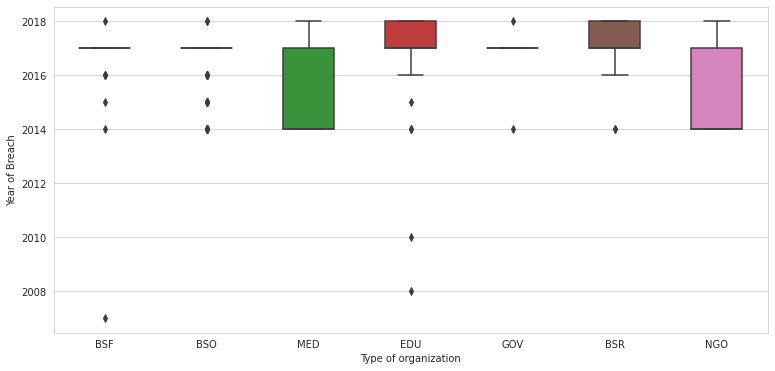

In [26]:
#here I was just playing around with a box plot. Not sure If I'm keeping this viz.
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df3, x='Type of organization', y='Year of Breach', width=.5);

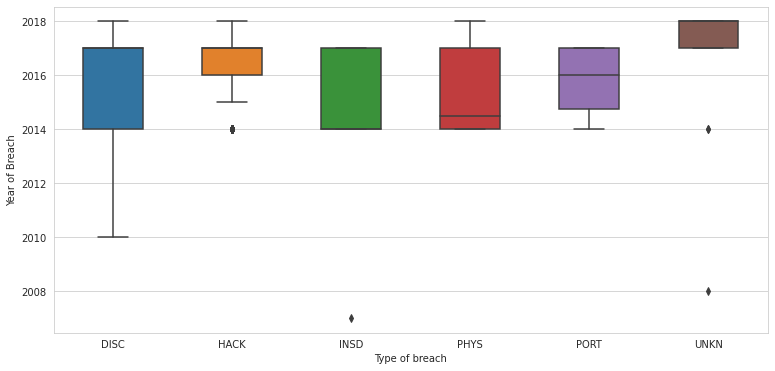

In [27]:
#here I was just playing around with a box plot. Not sure If I'm keeping this viz.
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df3, x='Type of breach', y='Year of Breach', width=.5);

In [28]:
#The column for text was merged into one large list, which then allows for the creation of WordCloud

lst = df3.text
def flatten(lst):
    for elem in lst:
        if type(elem) in (tuple,list):
           for i in flatten(elem):
               yield i
        else:
             yield elem 
hacked_lists = list (flatten(lst))
hacked_lists

['summit client files tax return mail client cd contains tax return january february connection performing tax return services clients mailed cds sixty seven clients intended cds would contain individual recipient tax return information april client contacted summit inform us single cd clients data it immediately retrieved dc confirmed individual retained information cd time reason believe cds information relating clients stored them may one client contacted us informed us cd he she received also contained clients tax return compiled result immediately began investigation started personally visit sixty seven clients retrieve cds issued january february cds either destroyed clients personally collected summit maintaining locked container ',
 ' what happenedbased upon extensive forensic investigation appears unauthorized individuals installed malicious software payment processing systems designed capture payment card information inputted systems what information involvedbased information

In [29]:
flt_hacked_lists = ' '.join(hacked_lists)
len(flt_hacked_lists)

182593

In [30]:
from wordcloud import WordCloud, STOPWORDS
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
 
import warnings
warnings.simplefilter(action='ignore')
 
%matplotlib inline

In [31]:
# Set word cloud params and instantiate the word clould.
# The height and width only affect the output image file.
WC_height = 1000
WC_width = 2000
WC_max_words = 200
 

In [32]:
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
 
print("\nWord cloud with most frequently occurring words (unigrams).")


Word cloud with most frequently occurring words (unigrams).


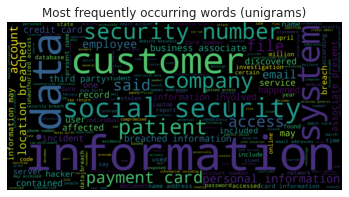

In [33]:
#wordCloud.generate_from_frequencies(hacked_lists)
wordCloud.generate_from_text(flt_hacked_lists)
plt.title('Most frequently occurring words (unigrams)')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
 
wordCloud.to_file("WordCloud_Unigrams_frequent_words.png")
 